In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as sft
#import scipy.interpolate as sip
from functions import produce_signal, produce_spectrogram, viterbi, ComputeSNR, plot_spectrogram, whiten
from statutils import noise_model
from spectral import psd

Sa = np.log10((3.e-15)**2)  # m^2/sec^4/Hz
Si = np.log10((15.e-12)**2) # m^2/Hz

No CuPy
No CuPy or GPU PhenomHM module.
No CuPy or GPU response available.
No CuPy or GPU interpolation available.


In [2]:
fvec, data_f, signal_f, _, _, _, dt, Tobs = produce_signal(DOPLOT=False, dt=20,
                                                            m1   = 1.056676e+05,
                                                            m2   = 1.067167e+05,
                                                            c1   = -0.523733,
                                                            c2   = -0.117412, 
                                                            dist = 6109, # 61097.116076 
                                                            inc  = 1.420048,
                                                            beta = -1.081082,
                                                            lam  = 4.052963,
                                                            psi  = 1.228444,
                                                            phi0 = 0.641716,
                                                            )

(1, 65709)


/Users/nikos/work/Git/LISA/snakes_on_lisa/Viterbi_nikiforos/statutils.py:178: RuntimeWarning: divide by zero encountered in divide
  Spm = 10**(Sa[:,None]) * (1.0 + (0.4e-3/self._f)**2) * (1.0+(self._f/8e-3)**4) * (2.0*xp.pi*self._f)**(-4.) * (2.0*xp.pi*self._f/clight)**2
/Users/nikos/work/Git/LISA/snakes_on_lisa/Viterbi_nikiforos/statutils.py:178: RuntimeWarning: divide by zero encountered in power
  Spm = 10**(Sa[:,None]) * (1.0 + (0.4e-3/self._f)**2) * (1.0+(self._f/8e-3)**4) * (2.0*xp.pi*self._f)**(-4.) * (2.0*xp.pi*self._f/clight)**2
/Users/nikos/work/Git/LISA/snakes_on_lisa/Viterbi_nikiforos/statutils.py:178: RuntimeWarning: invalid value encountered in multiply
  Spm = 10**(Sa[:,None]) * (1.0 + (0.4e-3/self._f)**2) * (1.0+(self._f/8e-3)**4) * (2.0*xp.pi*self._f)**(-4.) * (2.0*xp.pi*self._f/clight)**2
/Users/nikos/work/Git/LISA/snakes_on_lisa/Viterbi_nikiforos/statutils.py:179: RuntimeWarning: divide by zero encountered in divide
  Sop = 10**(Si[:,None]) * (1.0 + (2.e-3/self._f)*

Preprocess some more

(1e-40, 1e-35)

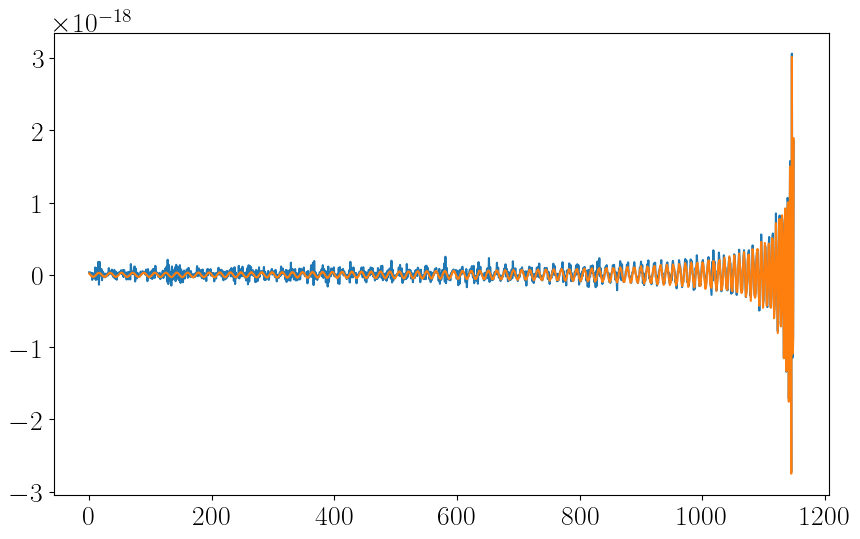

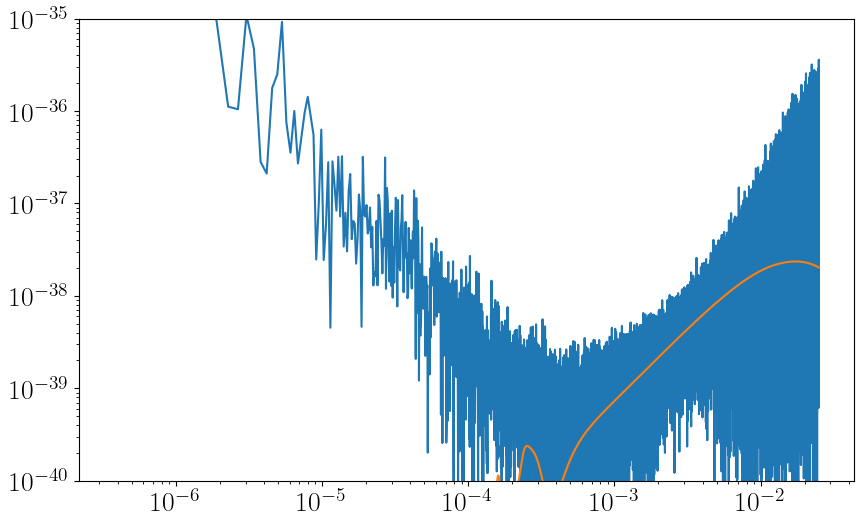

In [3]:
# data = np.concatenate((zeros, data_f))
data = sft.irfft(data_f)

# signal = np.concatenate((zeros, signal_f))
r = sft.irfft(signal_f)

plt.figure()
# plt.plot(data[-10000:-2000])
# plt.plot(r[-10000:-2000])
plt.plot(data[-1500:-350])
plt.plot(r[-1500:-350])

f1, S1, _ = psd(r, 1/dt, navs=1, win='rectangular')
f2, S2, _ = psd(data, 1/dt, navs=1, win='rectangular')

plt.figure()
plt.loglog(f2,S2)
plt.loglog(f1,S1)
plt.ylim(1e-40, 1e-35)

Chop the data to make it a bit faster and a little bit more realistic

In [4]:
data = data[-20000:-350]
r = r[-20000:-350]

/Users/nikos/work/Git/LISA/snakes_on_lisa/Viterbi_nikiforos/statutils.py:178: RuntimeWarning: divide by zero encountered in divide
  Spm = 10**(Sa[:,None]) * (1.0 + (0.4e-3/self._f)**2) * (1.0+(self._f/8e-3)**4) * (2.0*xp.pi*self._f)**(-4.) * (2.0*xp.pi*self._f/clight)**2
/Users/nikos/work/Git/LISA/snakes_on_lisa/Viterbi_nikiforos/statutils.py:178: RuntimeWarning: divide by zero encountered in power
  Spm = 10**(Sa[:,None]) * (1.0 + (0.4e-3/self._f)**2) * (1.0+(self._f/8e-3)**4) * (2.0*xp.pi*self._f)**(-4.) * (2.0*xp.pi*self._f/clight)**2
/Users/nikos/work/Git/LISA/snakes_on_lisa/Viterbi_nikiforos/statutils.py:178: RuntimeWarning: invalid value encountered in multiply
  Spm = 10**(Sa[:,None]) * (1.0 + (0.4e-3/self._f)**2) * (1.0+(self._f/8e-3)**4) * (2.0*xp.pi*self._f)**(-4.) * (2.0*xp.pi*self._f/clight)**2
/Users/nikos/work/Git/LISA/snakes_on_lisa/Viterbi_nikiforos/statutils.py:179: RuntimeWarning: divide by zero encountered in divide
  Sop = 10**(Si[:,None]) * (1.0 + (2.e-3/self._f)*

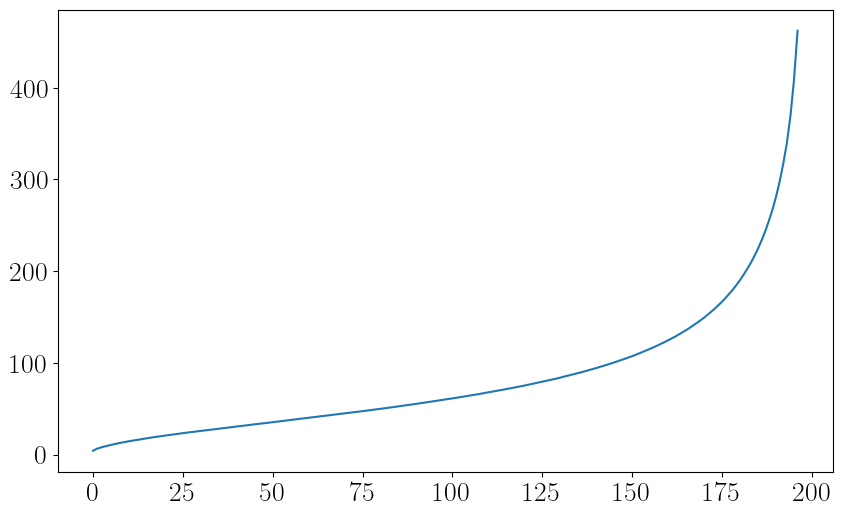

0 4.174351747443177 462.20822868759916


In [5]:
step = 100
n = r.size//step
prog = np.empty(n+1)

for i in range(1, n+1):
    s = sft.rfft(r[:i*step])
    freqs = sft.rfftfreq(i*step, dt)
    lisa_noise_model = noise_model(freqs)
    Sn = lisa_noise_model([Sa, Si]).squeeze()
    prog[i-1] = ComputeSNR(freqs, s, Sn)

s = sft.rfft(r)
freqs = sft.rfftfreq(r.size, dt)
lisa_noise_model = noise_model(freqs)
Sn = lisa_noise_model([Sa, Si]).squeeze()
prog[-1] = ComputeSNR(freqs, s, Sn)

plt.plot(prog)
plt.show()

ind = np.argmin(np.abs(prog - 5))
print(ind, prog[ind], prog.max())

In [6]:
vit   = data.copy()
Tobs  = (vit.size - 1)*dt
f_min = 1e-5
f_max = 1e-2
flims = [f_min, f_max]

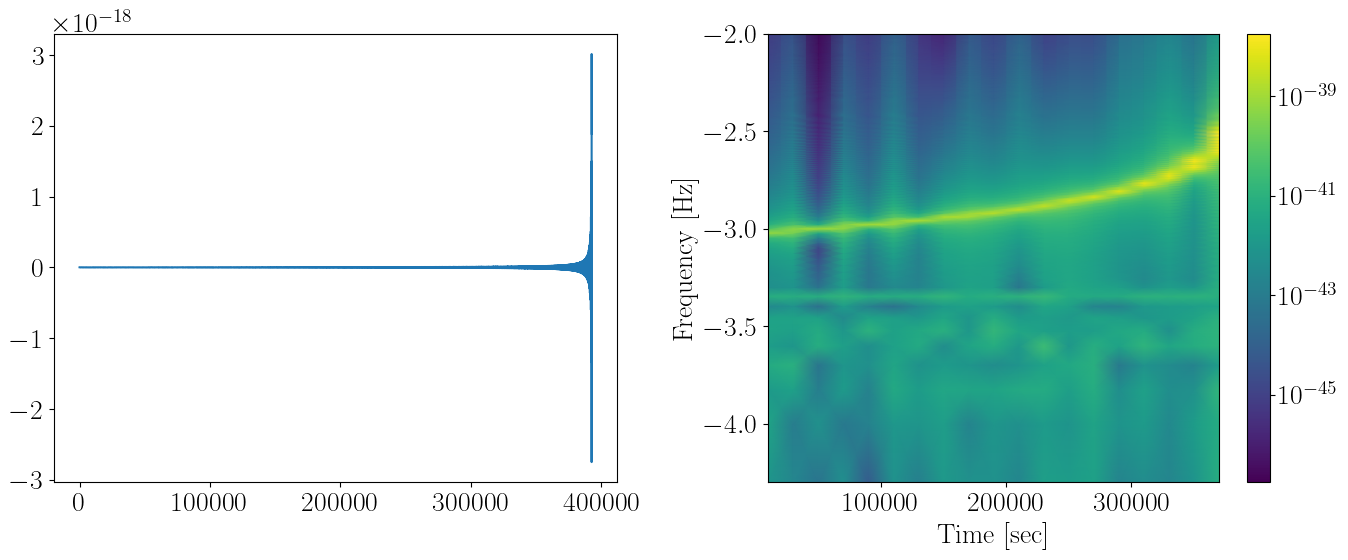

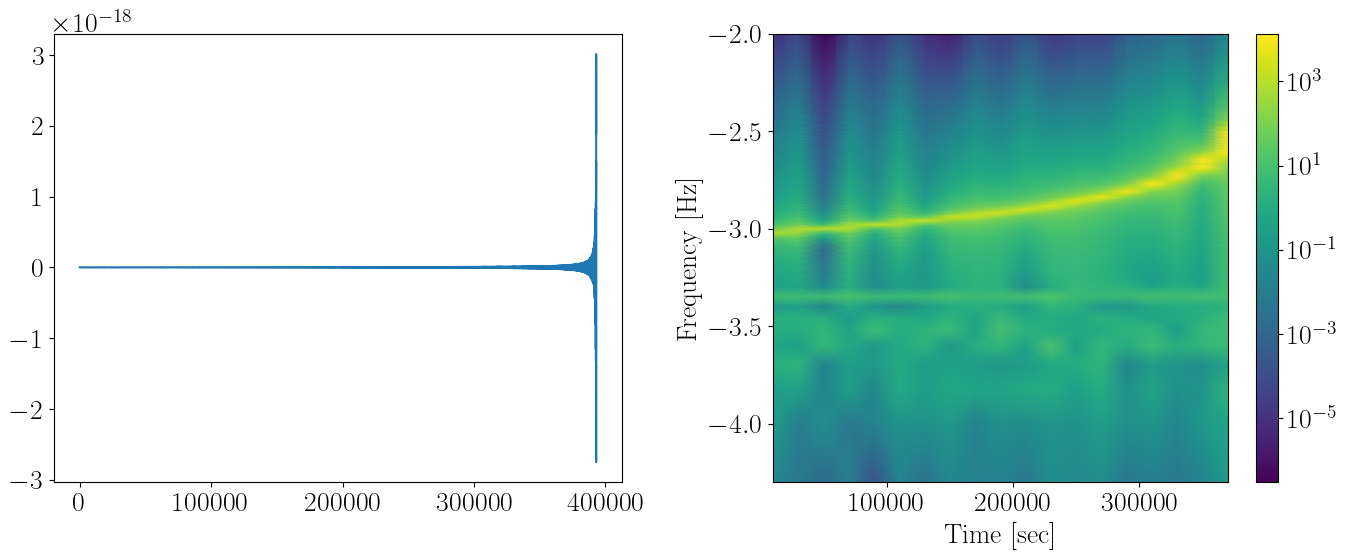

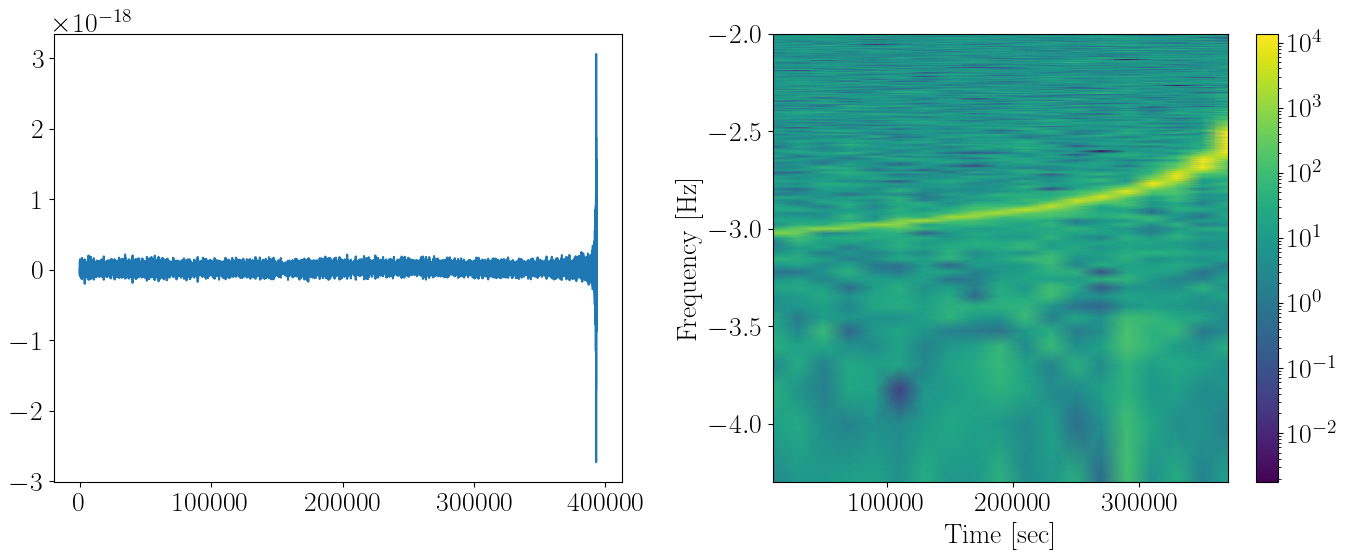

In [7]:
plot_spectrogram(Tobs, dt, r, flims, nperseg=1000, whiten=False) 
plot_spectrogram(Tobs, dt, r, flims, nperseg=1000, whiten=True) 
plot_spectrogram(Tobs, dt, data, flims, nperseg=1000, whiten=True) 

Computing time-frequency representation of the data...
Starting Viterbi algorithm.
Generating plots


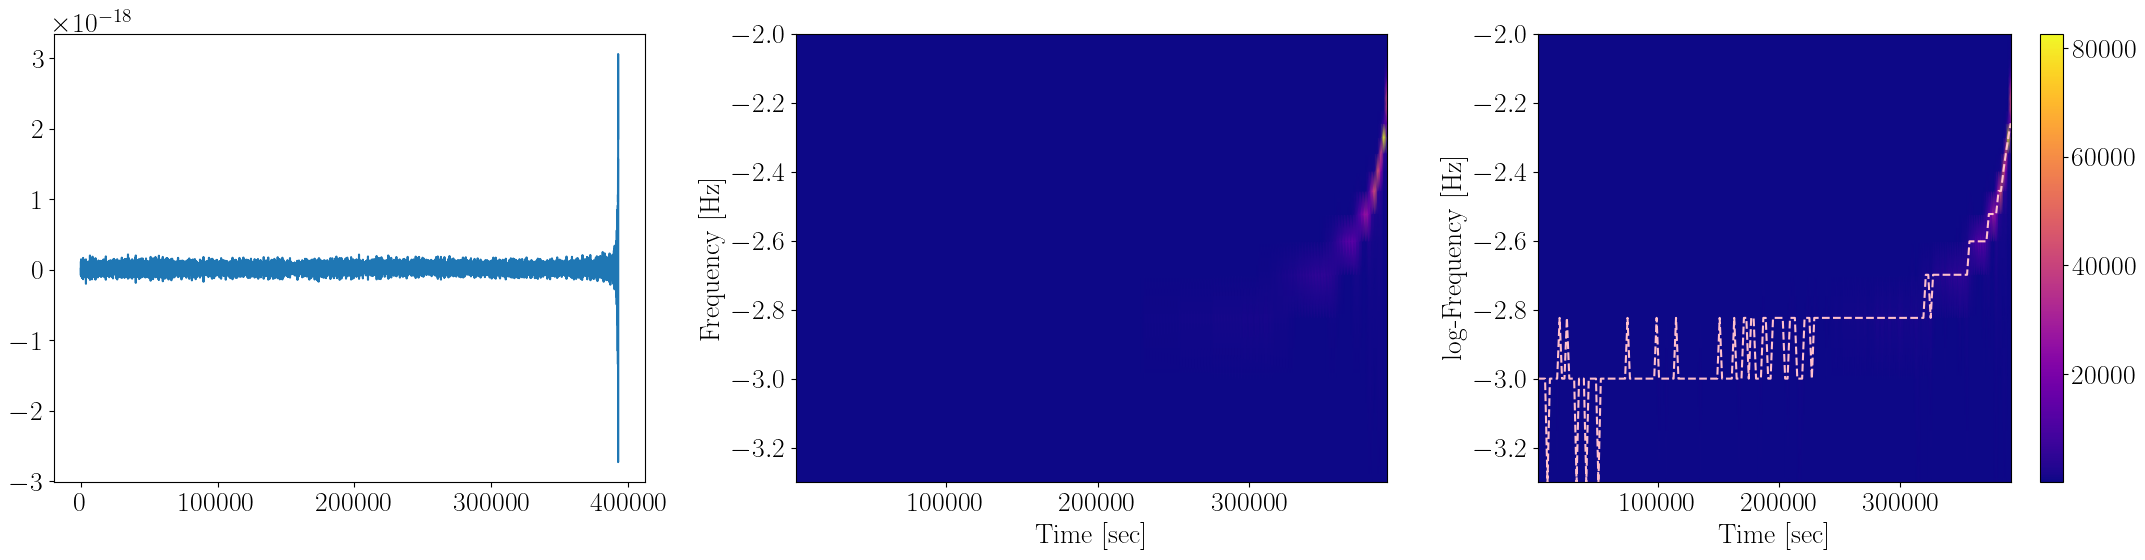

In [8]:
t, f, white = viterbi(vit, Tobs=Tobs, dt=dt, flims=flims, nperseg=100, signal=r, method='fft')

## Try to play with superlets

In [9]:
# Chop the data in order to get some memory saved
ndata = r.shape[0]
datachop = 5
r_super = r[-int(ndata/datachop):]
data_super = data[-int(ndata/datachop):]
tvec_super = np.arange(ndata)*dt

# Handle the new frequency vector
ndata_super = int(ndata/datachop)
tobs_super = ndata_super * dt + dt

# Carefully select the length of the frequency vector
if (ndata_super % 2)==0:              
    nfft = int((ndata_super/2)+1)
else:
    nfft = int((ndata_super+1)/2)
F  = (1/tobs_super)*nfft                 
fr = np.arange(0, F, (1/tobs_super)) 

print(f"- I'll use {nfft} number of points.")

- I'll use 1966 number of points.


### First use the official implementation

The code can be found [here](https://github.com/TransylvanianInstituteOfNeuroscience/Superlets/tree/main).

In [10]:
import sys
sys.path.append('/Users/nikos/work/Git/Software/Superlets/python/')
from superlet import superlets

In [11]:
# now whiten the data
data_super_whiten = whiten(data_super, dt)
r_super_whiten = whiten(r_super, dt)

/Users/nikos/work/Git/LISA/snakes_on_lisa/Viterbi_nikiforos/functions.py:494: RuntimeWarning: invalid value encountered in divide
  white_hf = hf / (np.sqrt(psd)) # white_hf = hf / (np.sqrt(psd / dt / 2.))


/var/folders/yz/xf637mpx56g2dvdv9d8v1fnm0000gn/T/ipykernel_9000/4200463814.py:6: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(fr[0], fr[-1])


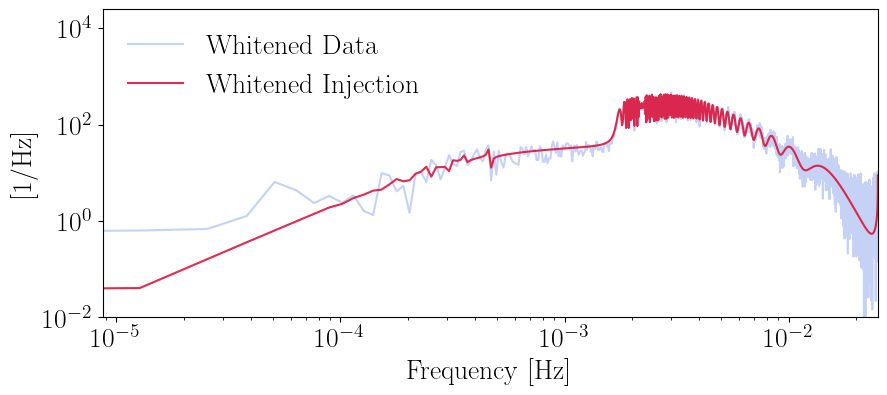

In [12]:
plt.figure(figsize=(10,4))
plt.loglog(fr, 2*(1/tobs_super)*np.absolute(np.fft.rfft(data_super_whiten))**2 , label='Whitened Data', alpha=0.3, color='royalblue')
plt.loglog(fr, 2*(1/tobs_super)*np.absolute(np.fft.rfft(r_super_whiten))**2 , label='Whitened Injection', alpha=0.9, color='crimson')
plt.ylabel('[1/Hz]')
plt.xlabel('Frequency [Hz]')
plt.xlim(fr[0], fr[-1])
plt.ylim(1e-2, )
plt.legend(loc='upper left',frameon=False)

In [13]:
order=5
c = 10

spec0 = superlets(data_super_whiten, 1/dt, fr[1:], c, [order])
spec1 = superlets(r_super_whiten, 1/dt, fr[1:], c, [order])

Text(0, 0.5, 'Frequency [Hz]')

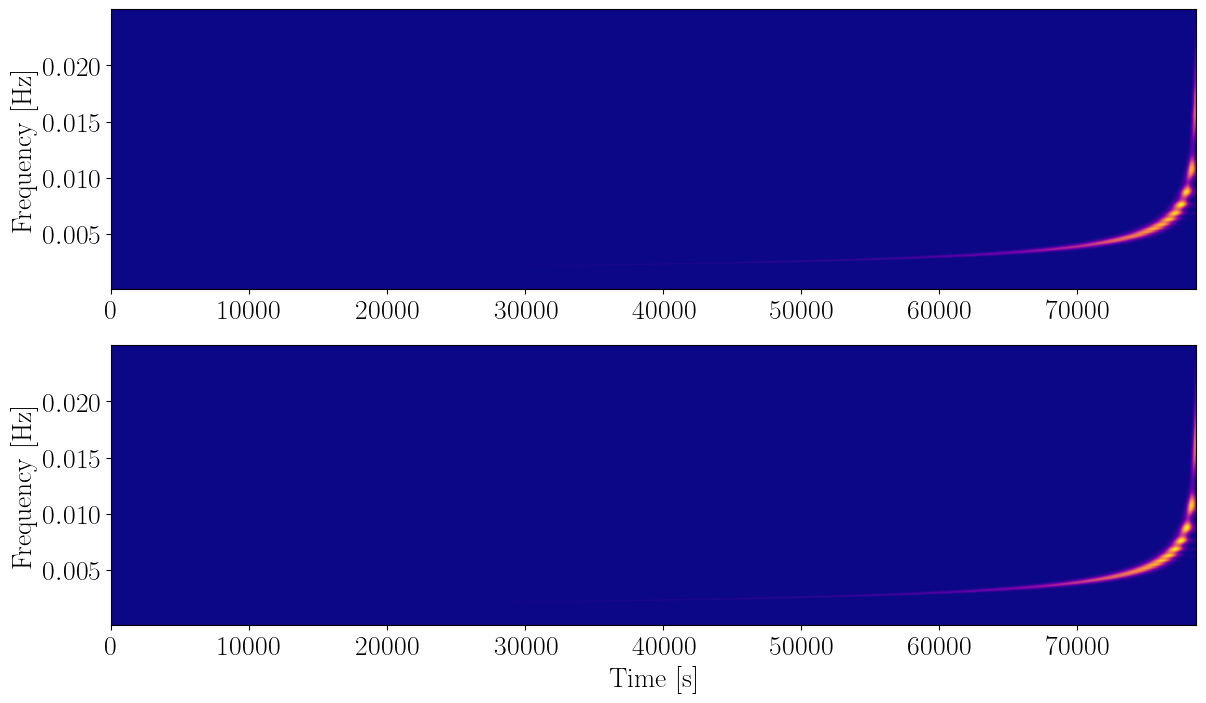

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,8))
ax1.imshow(spec0**2, cmap="plasma", interpolation="none", origin="lower", aspect="auto", 
                        extent=[0, len(r_super_whiten)*dt, fr[1], fr[-1]]) 
ax1.set_ylabel("Frequency [Hz]")

ax2.imshow(spec1**2, cmap="plasma", interpolation="none", origin="lower", aspect="auto", 
                        extent=[0, len(r_super_whiten)*dt, fr[1], fr[-1]]) 
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Frequency [Hz]")

Now run the Viterbi on this type of data

Computing time-frequency representation of the data...
Starting Viterbi algorithm.
Generating plots


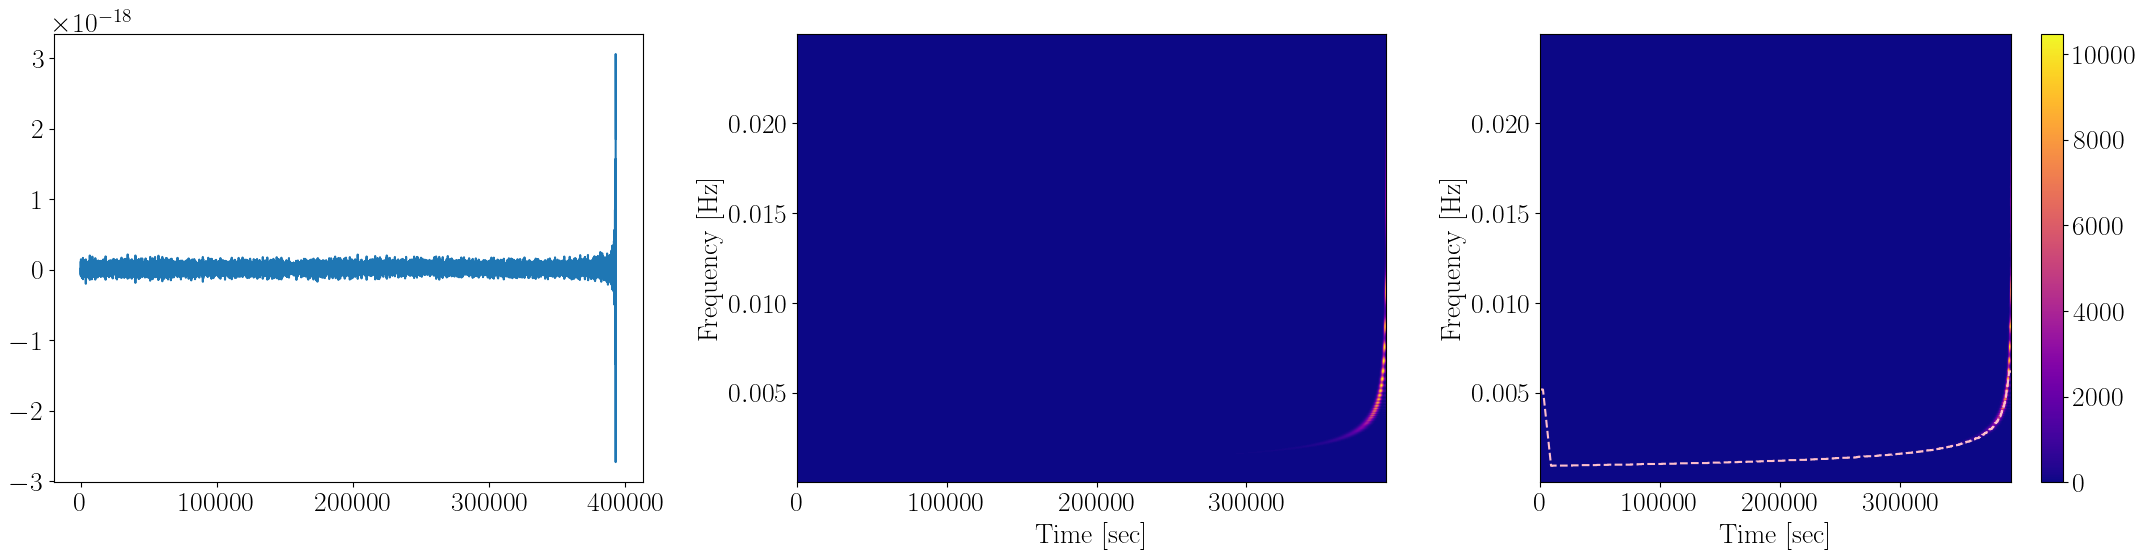

In [15]:
t, f, white = viterbi(vit, Tobs=Tobs, dt=dt, flims=flims, signal=r, f=fr, method='superlet')

### Now try to Jax implementation - This one fails due to memory issues

In [16]:
# import jax.numpy as jnp
# sys.path.append('/Users/nikos/work/Git/Software/superlets_irhum/superlets/')
# from superlets import adaptive_superlet_transform

In [17]:
# base_cycle = 30
# min_order  = 30
# max_order  = 40
# fs         = 1/dt

# scal = adaptive_superlet_transform(jnp.asarray(r_super),  jnp.asarray(fr), sampling_freq=fs, 
#                                         base_cycle=base_cycle, min_order=min_order, max_order=max_order, mode='mul')

# scald = adaptive_superlet_transform(jnp.asarray(data_super),  jnp.asarray(fr), sampling_freq=fs, 
#                                         base_cycle=base_cycle, min_order=min_order, max_order=max_order, mode='mul')

In [18]:
# fig, ax = plt.subplots(ncols=1)
# ax.imshow(jnp.abs(scal)**2, cmap="jet", interpolation="none", origin="lower",) # extent=[0, len(r)/fs, fr[0], fr[-1]]
# ax.set_title(f"Signal only, Base cycles: {base_cycle}, Orders: {min_order}-{max_order}")
# ax.set_xlabel("Time (s)")
# ax.set_ylabel("Frequency (Hz)")

# fig, ax = plt.subplots(ncols=1)
# ax.imshow(jnp.abs(scald)**2, cmap="jet", interpolation="none", origin="lower",) # extent=[0, len(r)/fs, fr[0], fr[-1]]
# ax.set_title(f"With noise, Base cycles: {base_cycle}, Orders: {min_order}-{max_order}")
# ax.set_xlabel("Time (s)")
# ax.set_ylabel("Frequency (Hz)")

# $fin$